# COVID-19 relationship between liver cancer

Done by: Sebastian Sarasti

Data comes from:

https://www.kaggle.com/datasets/fedesoriano/covid19-effect-on-liver-cancer-prediction-dataset

Atributes

1. Cancer: Cancer flag [Y/N]

undefined. Year: Categorical [Prepandemic (March 2019–February 2020)/Postpandemic(March 2020–February 2021)]

undefined. Month: Month of the year 1-12

undefined. Bleed: Spontaneous tumour haemorrhage [Y/N]

undefined. Mode Presentation: Surveillance, Incidental, or Symptomatic

undefined. Age: Age of the patitent

undefined. Gender: Male or Female [M/F]

undefined. Etiology: manner of causation of a disease or condition. Either "No established CLD" (chronic liver disease), "ARLD" (alcohol-related liver disease), "NAFLD" (non-alcoholic fatty liver disease), "HCV" (hepatitis C virus), "HH" (hereditary haemochromatosis), "PBC/AIH" (primary biliary cholangitis/autoimmune hepatitis), "HBV" (hepatitis B virus), or "Other".

undefined. Cirrhosis: Underlying liver disease [Y/N]

undefined. Size: Tumour diameter in mm

undefined. HCC TNM Stage: Hepatocellular carcinoma Tumour node metastasis Stage ("I", "II", "IIIA+IIIB", "IV")

undefined. HCC BCLC Stage: Hepatocellular carcinoma Barcelona Clinic for Liver Cancer Stage ("0", "A", "B", "C", "D")

undefined. ICC TNM Stage: Intrahepatic cholangiocarcinoma Tumour node metastasis Stage ("I", "II", "III", "IV")

undefined. Treatment grps: First-line treatment received ["OLTx" (orthotopic liver transplantation), "Resection", "Ablation", "TACE"" (transarterial chemoembolisation), "SIRT" (selective internal radiation therapy), "Medical", "Supportive care"]

undefined. Survival from MDM: Survival from Multidisciplinary meeting

undefined. Alive Dead: "Alive", "Dead"

undefined. Type of incidental finding: ("Primary care-routine", "Secondary care-routine", "Primary care-acute", "Secondary care-acute")

undefined. Surveillance programme: Patient in a formal surveillance programme ("Y", "N")

undefined. Surveillance effectiveness: Surveillance adherence over previous year ("Consistent", "Inconsistent", "Missed")

undefined. Mode of surveillance detection: Mode of incident surveillance test ["US" (ultrasound), "AFP alone" (alpha-fetoprotein alone), "CT/MRI"]

undefined. Time diagnosis 1st Tx:

undefined. Date incident surveillance scan: ("Y", "N")

undefined. PS: Performance status [0, 1, 2, 3, 4]

undefined. Time MDM 1st treatment: Time to Multidisciplinary meeting 1st treatment

undefined. Time decision to treat 1st treatment: Time decision to treat 1st treatment

undefined. Prev known cirrhosis: ["Y", "N"]

undefined. Months from last surveillance: Months from last surveillance

Goal: To assess the impact of the COVID-19 pandemic on patients with newly diagnosed liver cancer.

Start by importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [2]:
data = pd.read_csv('/work/covid-liver.csv')

In [3]:
data

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22.0,...,Y,Consistent,US,0.47,NaN,0.0,0.70,NaN,Y,7.333333
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40.0,...,Y,Consistent,US,NaN,NaN,2.0,NaN,NaN,Y,4.033333
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52.0,...,Y,Consistent,US,NaN,NaN,0.0,NaN,NaN,Y,5.900000
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80.0,...,N,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12,NaN,Symptomatic,72,F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Y,NaN
446,N,Pandemic,12,NaN,Symptomatic,63,M,NaN,NaN,75.0,...,NaN,NaN,NaN,2.93,NaN,0.0,1.63,1.63,Y,NaN
447,N,Pandemic,12,NaN,Symptomatic,79,F,NaN,NaN,63.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Y,NaN
448,N,Pandemic,12,NaN,Symptomatic,84,F,NaN,NaN,65.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN


## Data validation

1. What kind of variables are available in the dataset?

In [4]:
data.dtypes

Cancer                                 object
Year                                   object
Month                                   int64
Bleed                                  object
Mode_Presentation                      object
Age                                     int64
Gender                                 object
Etiology                               object
Cirrhosis                              object
Size                                  float64
HCC_TNM_Stage                          object
HCC_BCLC_Stage                         object
ICC_TNM_Stage                          object
Treatment_grps                         object
Survival_fromMDM                      float64
Alive_Dead                             object
Type_of_incidental_finding             object
Surveillance_programme                 object
Surveillance_effectiveness             object
Mode_of_surveillance_detection         object
Time_diagnosis_1st_Tx                 float64
Date_incident_surveillance_scan   

2. How many kind of variables are available?

In [5]:
(data
.dtypes
.value_counts())

object     18
float64     7
int64       2
dtype: int64

3. How many variables and observations are available in the dataset?

In [6]:
data.shape

(450, 27)

4. Does the dataset have null variables?

In [7]:
data.isnull().any()

Cancer                                False
Year                                  False
Month                                 False
Bleed                                  True
Mode_Presentation                     False
Age                                   False
Gender                                False
Etiology                               True
Cirrhosis                              True
Size                                   True
HCC_TNM_Stage                          True
HCC_BCLC_Stage                         True
ICC_TNM_Stage                          True
Treatment_grps                         True
Survival_fromMDM                      False
Alive_Dead                            False
Type_of_incidental_finding             True
Surveillance_programme                 True
Surveillance_effectiveness             True
Mode_of_surveillance_detection         True
Time_diagnosis_1st_Tx                  True
Date_incident_surveillance_scan        True
PS                              

6. How many null is in each variable?

In [8]:
data.isnull().sum()

Cancer                                  0
Year                                    0
Month                                   0
Bleed                                 140
Mode_Presentation                       0
Age                                     0
Gender                                  0
Etiology                              139
Cirrhosis                             139
Size                                   50
HCC_TNM_Stage                         139
HCC_BCLC_Stage                        139
ICC_TNM_Stage                         311
Treatment_grps                          2
Survival_fromMDM                        0
Alive_Dead                              0
Type_of_incidental_finding            326
Surveillance_programme                139
Surveillance_effectiveness            333
Mode_of_surveillance_detection        352
Time_diagnosis_1st_Tx                 292
Date_incident_surveillance_scan       417
PS                                      2
Time_MDM_1st_treatment            

7. What is the proportion of null values in each variable?

In [9]:
n_val =  data.isnull().melt()

In [10]:
n_val

,variable,value
0,Cancer,False
1,Cancer,False
2,Cancer,False
3,Cancer,False
4,Cancer,False
...,...,...
12145,Months_from_last_surveillance,True
12146,Months_from_last_surveillance,True
12147,Months_from_last_surveillance,True
12148,Months_from_last_surveillance,True


In [11]:
import seaborn as sns

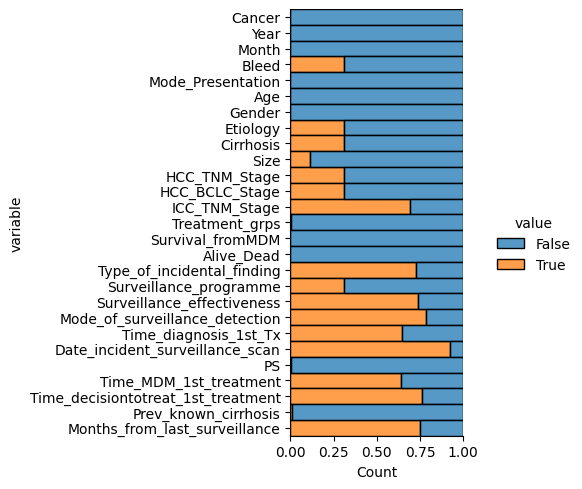

In [12]:
sns.displot(data=data, y=n_val.variable, hue=n_val.value, multiple='fill')

8. How null value are distribuited per each observation?

In [13]:
null_val = data.T.isnull()

<AxesSubplot:>

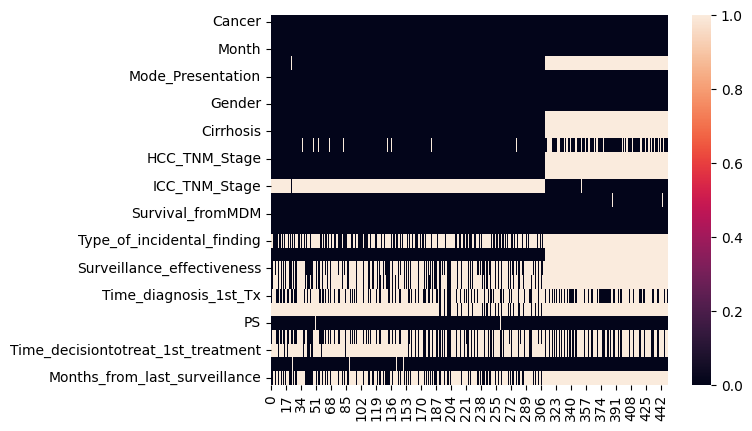

In [14]:
sns.heatmap(null_val)

Observation: the columns with more than 50% of the null values are going to be deleted for this analysis. This is because the few samples are not able to generalize the behaviour and distribution of this variable.

In [15]:
deleted_cate = ['ICC_TNM_Stage', 'Type_of_incidental_finding', 'Surveillance_effectiveness',  \
            'Mode_of_surveillance_detection', 'Time_diagnosis_1st_Tx', 'Date_incident_surveillance_scan', \
            'Time_MDM_1st_treatment', 'Time_decisiontotreat_1st_treatment', 'Months_from_last_surveillance']

In [16]:
data = data.drop(deleted_cate, axis=1)

The data set has a lot of null values, several techniques are going to be done to fill out missing values.

In [17]:
null_columns = [col for col in data.columns if data[col].isnull().any()]
numeric_columns = data._get_numeric_data()
categorical_columns = [a for a in data.columns if a not in numeric_columns]
null_numeric = [col for col in numeric_columns if col in numeric_columns and col in null_columns]
null_categorical = [col for col in null_columns if col not in null_numeric]

In [18]:
null_numeric

['Size', 'PS']

In [19]:
null_categorical

['Bleed',
 'Etiology',
 'Cirrhosis',
 'HCC_TNM_Stage',
 'HCC_BCLC_Stage',
 'Treatment_grps',
 'Surveillance_programme',
 'Prev_known_cirrhosis']

1. Numerical variables are going to be fill out with mean.

In [20]:
data[null_numeric] = data[null_numeric].fillna(data[null_numeric].mean())

In [21]:
data.isnull().sum()

Cancer                      0
Year                        0
Month                       0
Bleed                     140
Mode_Presentation           0
Age                         0
Gender                      0
Etiology                  139
Cirrhosis                 139
Size                        0
HCC_TNM_Stage             139
HCC_BCLC_Stage            139
Treatment_grps              2
Survival_fromMDM            0
Alive_Dead                  0
Surveillance_programme    139
PS                          0
Prev_known_cirrhosis        5
dtype: int64

See how missing data is distribuited now

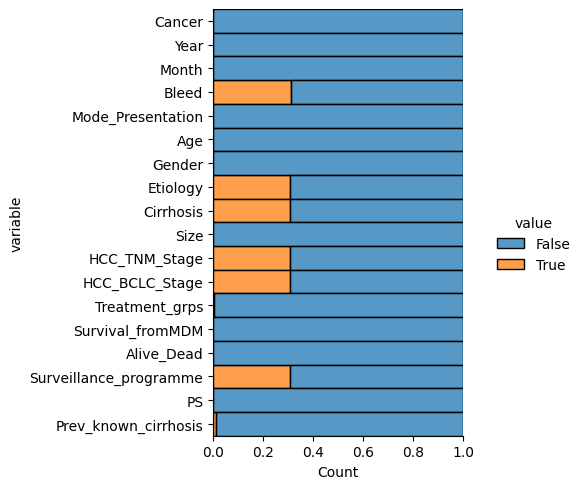

In [22]:
n_val =  data.isnull().melt()
sns.displot(data=data, y=n_val.variable, hue=n_val.value, multiple='fill')

2. Categorical values are going to be fill out through a K-NN Imputer. This is because it is not clear that variables might have a defined relation to make an interpolation.

In [23]:
data =  data.fillna("Missing")

Extract the column names of the categorical values

In [24]:
labels_cate = [pd.unique(data[i]) for i in categorical_columns]

In [25]:
labels_cate = [a.tolist() for a in labels_cate]

Extract the missing label from all the lists

In [26]:
for i in range(len(labels_cate)):
    labels_cate[i] = [a for a in labels_cate[i] if a!="Missing"]

In [27]:
labels_cate

[['Y', 'N'],
 ['Prepandemic', 'Pandemic'],
 ['N', 'Y'],
 ['Surveillance', 'Incidental', 'Symptomatic'],
 ['M', 'F'],
 ['NAFLD',
  'ARLD',
  'HCV',
  'No established CLD',
  'PBC/AIH',
  'HH',
  'HBV',
  'Other'],
 ['Y', 'N'],
 ['II', 'I', 'IV', 'IIIA+IIIB'],
 ['A', 'D', 'B', 'C', '0'],
 ['Ablation',
  'Supportive care',
  'Medical',
  'TACE',
  'SIRT',
  'OLTx',
  'Resection'],
 ['Alive', 'Dead'],
 ['Y', 'N'],
 ['Y', 'N']]

Assign values from 0 to n for each categorical variable

In [28]:
data_cat_re =  data.copy()
for i,j in zip(categorical_columns, labels_cate):
    data_cat_re[i] = data_cat_re[i].replace(j,list(range(len(j))))

In [29]:
data_cat_re

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,HCC_TNM_Stage,HCC_BCLC_Stage,Treatment_grps,Survival_fromMDM,Alive_Dead,Surveillance_programme,PS,Prev_known_cirrhosis
0,0,0,1,0,0,68,0,0,0,22.000,0,0,0,32.73,0,0,0.0,0
1,0,0,1,0,0,70,0,1,0,40.000,1,1,1,3.03,1,0,2.0,0
2,0,0,1,0,0,64,0,1,0,52.000,2,2,2,14.97,1,0,0.0,0
3,0,0,1,0,1,73,0,1,0,80.000,2,3,1,1.40,1,1,2.0,0
4,0,0,1,0,1,66,1,1,0,60.000,1,4,1,32.50,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,1,12,Missing,2,72,1,Missing,Missing,53.355,Missing,Missing,1,1.20,1,Missing,1.0,0
446,1,1,12,Missing,2,63,0,Missing,Missing,75.000,Missing,Missing,2,9.67,0,Missing,0.0,0
447,1,1,12,Missing,2,79,1,Missing,Missing,63.000,Missing,Missing,1,1.47,1,Missing,1.0,0
448,1,1,12,Missing,2,84,1,Missing,Missing,65.000,Missing,Missing,2,1.67,1,Missing,2.0,0


Replace the Missing for NaN numpy values

In [30]:
data_cat_re = data_cat_re.replace("Missing", np.nan)

Make a data imputation with the KNN 

In [31]:
from sklearn.impute import KNNImputer

Start the imputation

In [32]:
knn_imputer = KNNImputer(n_neighbors=10)
data_knn_imputed = knn_imputer.fit_transform(data_cat_re)

In [33]:
data_knn_imputed.shape

(450, 18)

In [34]:
data_knn = pd.DataFrame(data_knn_imputed, columns= list(data.columns))

Round values only for the categorical variables that were predicted

In [35]:
for i in null_categorical:
    data_knn[i] = data_knn[i].round(decimals=0) 

See the results

In [36]:
data_knn

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,HCC_TNM_Stage,HCC_BCLC_Stage,Treatment_grps,Survival_fromMDM,Alive_Dead,Surveillance_programme,PS,Prev_known_cirrhosis
0,0.0,0.0,1.0,0.0,0.0,68.0,0.0,0.0,0.0,22.000,0.0,0.0,0.0,32.73,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,70.0,0.0,1.0,0.0,40.000,1.0,1.0,1.0,3.03,1.0,0.0,2.0,0.0
2,0.0,0.0,1.0,0.0,0.0,64.0,0.0,1.0,0.0,52.000,2.0,2.0,2.0,14.97,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,73.0,0.0,1.0,0.0,80.000,2.0,3.0,1.0,1.40,1.0,1.0,2.0,0.0
4,0.0,0.0,1.0,0.0,1.0,66.0,1.0,1.0,0.0,60.000,1.0,4.0,1.0,32.50,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1.0,1.0,12.0,0.0,2.0,72.0,1.0,1.0,0.0,53.355,1.0,2.0,1.0,1.20,1.0,1.0,1.0,0.0
446,1.0,1.0,12.0,0.0,2.0,63.0,0.0,1.0,0.0,75.000,3.0,2.0,2.0,9.67,0.0,1.0,0.0,0.0
447,1.0,1.0,12.0,0.0,2.0,79.0,1.0,1.0,1.0,63.000,2.0,3.0,1.0,1.47,1.0,1.0,1.0,0.0
448,1.0,1.0,12.0,0.0,2.0,84.0,1.0,1.0,1.0,65.000,2.0,3.0,2.0,1.67,1.0,1.0,2.0,0.0


Transform again from values to names the categorical variables

In [37]:
data_knn_cat_val = data_knn.copy()

In [38]:
for i,j in zip(categorical_columns, labels_cate):
    data_knn[i] = data_knn[i].replace(list(range(len(j))),j)

Verify the results

In [39]:
data_knn

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,HCC_TNM_Stage,HCC_BCLC_Stage,Treatment_grps,Survival_fromMDM,Alive_Dead,Surveillance_programme,PS,Prev_known_cirrhosis
0,Y,Prepandemic,1.0,N,Surveillance,68.0,M,NAFLD,Y,22.000,II,A,Ablation,32.73,Alive,Y,0.0,Y
1,Y,Prepandemic,1.0,N,Surveillance,70.0,M,ARLD,Y,40.000,I,D,Supportive care,3.03,Dead,Y,2.0,Y
2,Y,Prepandemic,1.0,N,Surveillance,64.0,M,ARLD,Y,52.000,IV,B,Medical,14.97,Dead,Y,0.0,Y
3,Y,Prepandemic,1.0,N,Incidental,73.0,M,ARLD,Y,80.000,IV,C,Supportive care,1.40,Dead,N,2.0,Y
4,Y,Prepandemic,1.0,N,Incidental,66.0,F,ARLD,Y,60.000,I,0,Supportive care,32.50,Alive,N,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12.0,N,Symptomatic,72.0,F,ARLD,Y,53.355,I,B,Supportive care,1.20,Dead,N,1.0,Y
446,N,Pandemic,12.0,N,Symptomatic,63.0,M,ARLD,Y,75.000,IIIA+IIIB,B,Medical,9.67,Alive,N,0.0,Y
447,N,Pandemic,12.0,N,Symptomatic,79.0,F,ARLD,N,63.000,IV,C,Supportive care,1.47,Dead,N,1.0,Y
448,N,Pandemic,12.0,N,Symptomatic,84.0,F,ARLD,N,65.000,IV,C,Medical,1.67,Dead,N,2.0,Y


Summary: 

So far, the data was validated to avoid missing values. The numerical variables were fill out with the mean, while the categorical variables were filled out with a KNN-imputer. 

## Basic statistics

Categorical Data

In [40]:
data_knn.describe(include=object)

,Cancer,Year,Bleed,Mode_Presentation,Gender,Etiology,Cirrhosis,HCC_TNM_Stage,HCC_BCLC_Stage,Treatment_grps,Alive_Dead,Surveillance_programme,Prev_known_cirrhosis
count,450,450,450,450,450,450,450,450,450,450,450,450,450
unique,2,2,2,3,2,8,2,4,5,7,2,2,2
top,Y,Prepandemic,N,Symptomatic,M,ARLD,Y,I,C,Supportive care,Dead,N,Y
freq,310,266,444,201,335,185,330,172,161,237,264,286,275


See if data set is unbalanced or not with the main category for the analysis.

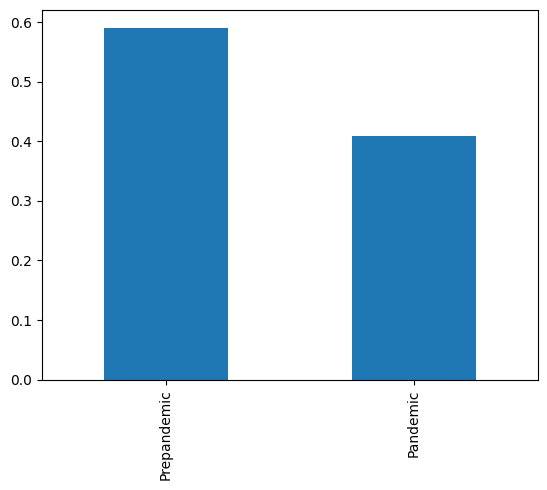

In [41]:
plt.figure()
data_knn['Year'].value_counts(normalize=True).plot(kind='bar')
plt.show()

From the previous graph, it can be seen that almost pandemic and pre-pandemic data is balanced. It is 60% vs 40%.

See the basic statistics from the numerical Data

In [42]:
data_knn.describe(include=np.number)

,Month,Age,Size,Survival_fromMDM,PS
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,6.757778,70.371111,53.355000,12.696622,1.225446
std,3.449476,10.572586,37.974132,9.703300,1.027712
min,1.000000,27.000000,10.000000,-0.030000,0.000000
25%,4.000000,65.000000,25.000000,4.032500,0.000000
50%,7.000000,72.000000,48.000000,10.785000,1.000000
75%,10.000000,78.000000,66.500000,21.282500,2.000000
max,12.000000,96.000000,220.000000,32.770000,4.000000


See the median and mode

In [43]:
data_knn.median()

Month                7.000
Age                 72.000
Size                48.000
Survival_fromMDM    10.785
PS                   1.000
dtype: float64

Partial Conclusions

From the previous calculus several things can be concluded:

1. It is almost equally distributed pandemic and pre-pandemic cases

undefined. The 50% of the patients were over 72 years and the rest under 72 years.

undefined. The 50% of the tumor had a size at least 48 mm

## Correlation between variables

<AxesSubplot:>

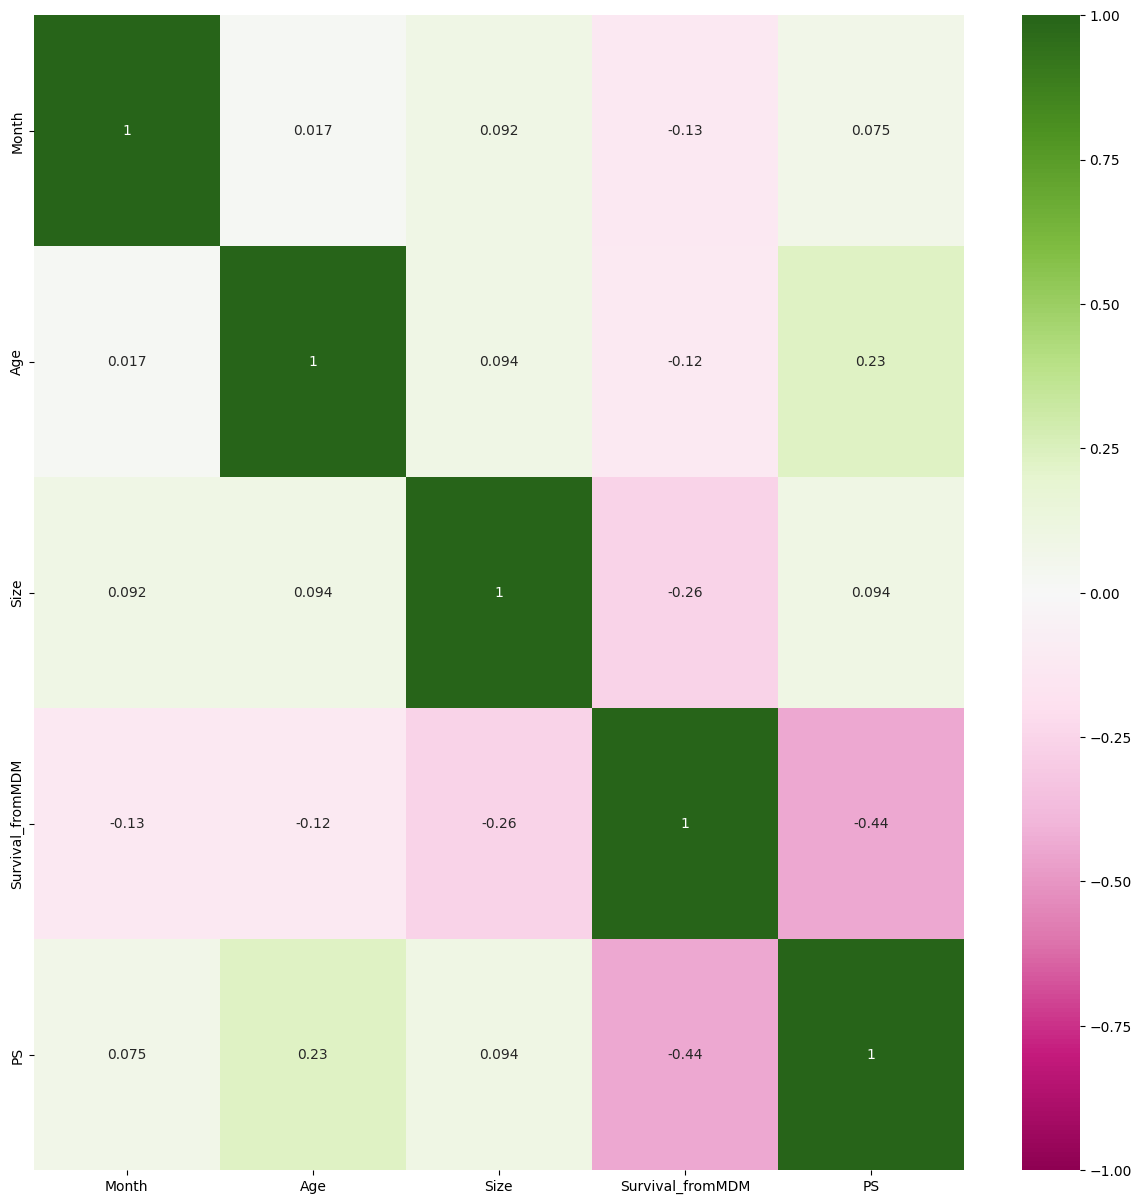

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(data_knn.corr(), cmap="PiYG", vmin=-1, vmax=1, annot=True)

There is no a clear linear correlation between the variables

See other relations between the numeric variables.

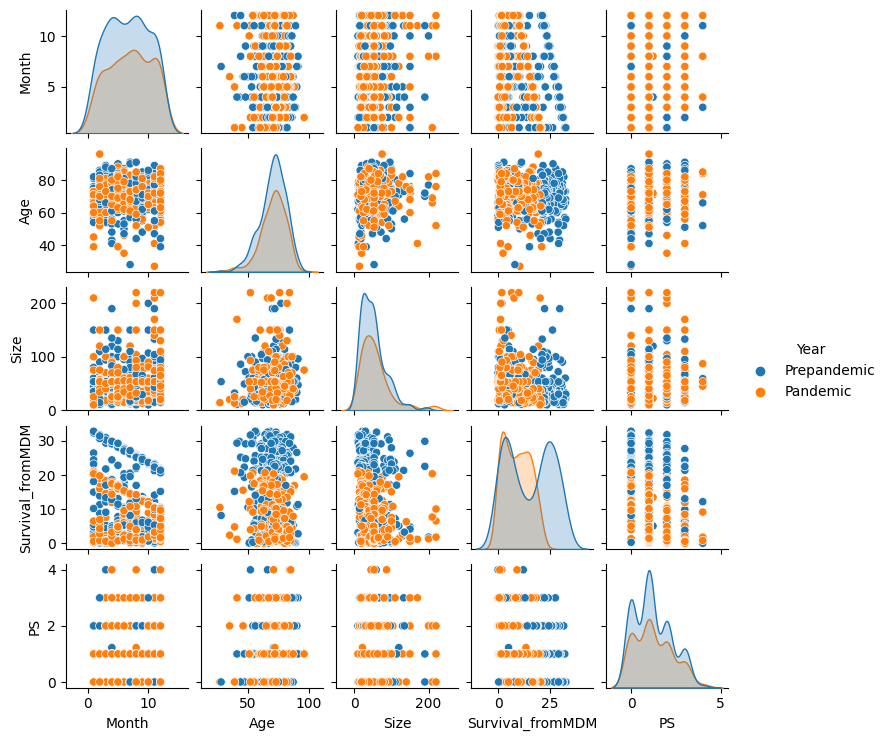

In [45]:
sns.pairplot(data_knn,  height=1.5, hue='Year');

With the last plot, it can be seen that it is not a clear relation between the numerical variables and pandemic or pre-pandemic time.

In [46]:
data_knn

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,HCC_TNM_Stage,HCC_BCLC_Stage,Treatment_grps,Survival_fromMDM,Alive_Dead,Surveillance_programme,PS,Prev_known_cirrhosis
0,Y,Prepandemic,1.0,N,Surveillance,68.0,M,NAFLD,Y,22.000,II,A,Ablation,32.73,Alive,Y,0.0,Y
1,Y,Prepandemic,1.0,N,Surveillance,70.0,M,ARLD,Y,40.000,I,D,Supportive care,3.03,Dead,Y,2.0,Y
2,Y,Prepandemic,1.0,N,Surveillance,64.0,M,ARLD,Y,52.000,IV,B,Medical,14.97,Dead,Y,0.0,Y
3,Y,Prepandemic,1.0,N,Incidental,73.0,M,ARLD,Y,80.000,IV,C,Supportive care,1.40,Dead,N,2.0,Y
4,Y,Prepandemic,1.0,N,Incidental,66.0,F,ARLD,Y,60.000,I,0,Supportive care,32.50,Alive,N,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12.0,N,Symptomatic,72.0,F,ARLD,Y,53.355,I,B,Supportive care,1.20,Dead,N,1.0,Y
446,N,Pandemic,12.0,N,Symptomatic,63.0,M,ARLD,Y,75.000,IIIA+IIIB,B,Medical,9.67,Alive,N,0.0,Y
447,N,Pandemic,12.0,N,Symptomatic,79.0,F,ARLD,N,63.000,IV,C,Supportive care,1.47,Dead,N,1.0,Y
448,N,Pandemic,12.0,N,Symptomatic,84.0,F,ARLD,N,65.000,IV,C,Medical,1.67,Dead,N,2.0,Y


## One-dimensional Analysis

### Tumor Size

- Was COVID a reason of increasing of the tumor size?

In [47]:
data_knn

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,HCC_TNM_Stage,HCC_BCLC_Stage,Treatment_grps,Survival_fromMDM,Alive_Dead,Surveillance_programme,PS,Prev_known_cirrhosis
0,Y,Prepandemic,1.0,N,Surveillance,68.0,M,NAFLD,Y,22.000,II,A,Ablation,32.73,Alive,Y,0.0,Y
1,Y,Prepandemic,1.0,N,Surveillance,70.0,M,ARLD,Y,40.000,I,D,Supportive care,3.03,Dead,Y,2.0,Y
2,Y,Prepandemic,1.0,N,Surveillance,64.0,M,ARLD,Y,52.000,IV,B,Medical,14.97,Dead,Y,0.0,Y
3,Y,Prepandemic,1.0,N,Incidental,73.0,M,ARLD,Y,80.000,IV,C,Supportive care,1.40,Dead,N,2.0,Y
4,Y,Prepandemic,1.0,N,Incidental,66.0,F,ARLD,Y,60.000,I,0,Supportive care,32.50,Alive,N,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12.0,N,Symptomatic,72.0,F,ARLD,Y,53.355,I,B,Supportive care,1.20,Dead,N,1.0,Y
446,N,Pandemic,12.0,N,Symptomatic,63.0,M,ARLD,Y,75.000,IIIA+IIIB,B,Medical,9.67,Alive,N,0.0,Y
447,N,Pandemic,12.0,N,Symptomatic,79.0,F,ARLD,N,63.000,IV,C,Supportive care,1.47,Dead,N,1.0,Y
448,N,Pandemic,12.0,N,Symptomatic,84.0,F,ARLD,N,65.000,IV,C,Medical,1.67,Dead,N,2.0,Y


<AxesSubplot:xlabel='Size', ylabel='Count'>

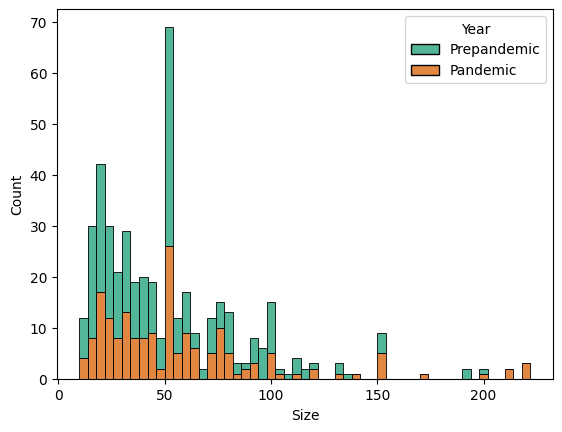

In [48]:
sns.histplot(data_knn, x='Size', hue='Year', binwidth=4, palette="Dark2", multiple="stack")


It seems that in the pre-pandemic time, the size of tumors detected were more around the 50 mm, while for the pandemic time, the peak is fewer. 

Likely, people were not able to detect in time the tumors during the pandemic because the hospitals were collapsed. Hence, bigger tumors were detected.

### Mode presentation

- Was COVID a reason to change the mode of presentation of the cancer?

<AxesSubplot:xlabel='Mode_Presentation', ylabel='Percent'>

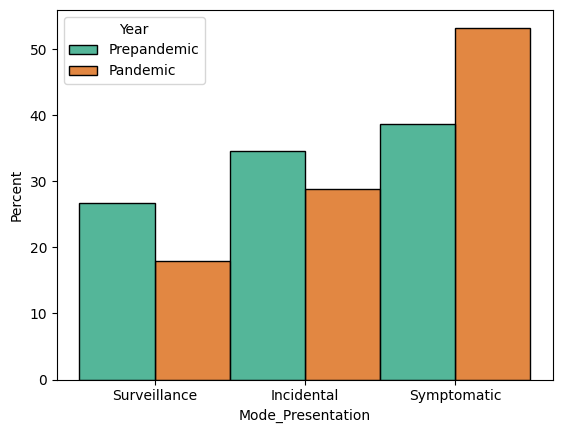

In [49]:
sns.histplot(data_knn, x='Mode_Presentation', hue='Year', palette="Dark2", multiple="dodge", stat = 'percent', common_norm= False)

It seems that  Symptomatic tumors were detected more in the pandemic than other tumors. It can be because incidental and surveillance might need doctor revisions and laboratory test.

### Age

- Did COVID change the age of the patient who had liver cancer?

<AxesSubplot:xlabel='Age', ylabel='Count'>

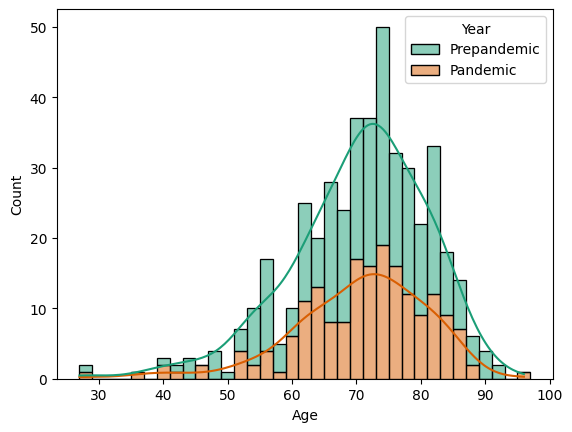

In [50]:
sns.histplot(data_knn, x='Age', hue='Year', binwidth=2, palette="Dark2", multiple="stack", kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

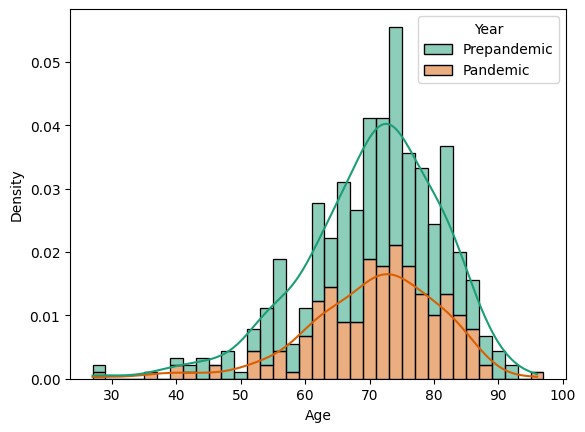

In [51]:
sns.histplot(data_knn, x='Age', hue='Year', binwidth=2, palette="Dark2", multiple="stack", kde=True, stat = 'density')

In [52]:
pre_age = data_knn[data_knn.Year=='Prepandemic'].Age
pan_age = data_knn[data_knn.Year=='Pandemic'].Age

In [53]:
pre_age.kurtosis()

0.6581074128371394

In [54]:
pan_age.kurtosis()

1.9525222809513951

Kurtosis Values is less than 3, so both distributions are platykurtic kind. It means that tails values are less than normal distribution, so the values tends to be located in the mean. 

Both distributions have the same mean, so the presence of COVID did not affected to the average age to have liver cancer.

In [55]:
pan_age.mean()

70.46195652173913

In [56]:
pre_age.mean()

70.30827067669173

The same behavior follows the median

In [57]:
pan_age.median()

72.0

In [58]:
pre_age.median()

72.0

### TGender

- Did COVID had more impact in one sex than other (Male of Female)?

<AxesSubplot:xlabel='Gender', ylabel='Percent'>

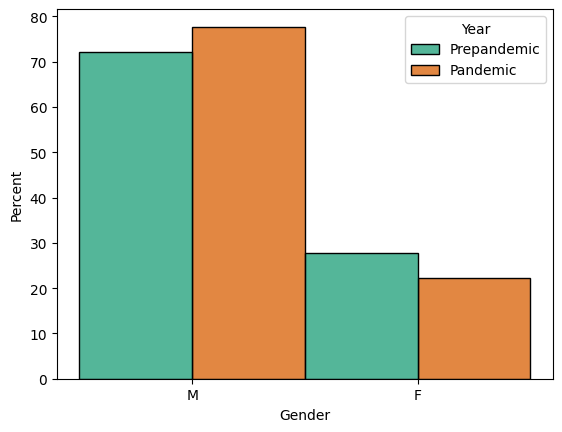

In [59]:
sns.histplot(data_knn, x='Gender', hue='Year', binwidth=2, palette="Dark2", multiple="dodge", stat='percent',  common_norm=False)

It seems likely men increases the liver cancer disease during the pandemic. One reason could be that drinking alcohol is more socially accepted for men than women in some countries. 

In addition, along the pandemic probably more men started to drink more alcohol, so it produced more liver cancer disease.

### Cirrhosis - Underlying disease

- Did COVID increases the underlying liver diseases?

<AxesSubplot:xlabel='Cirrhosis', ylabel='Count'>

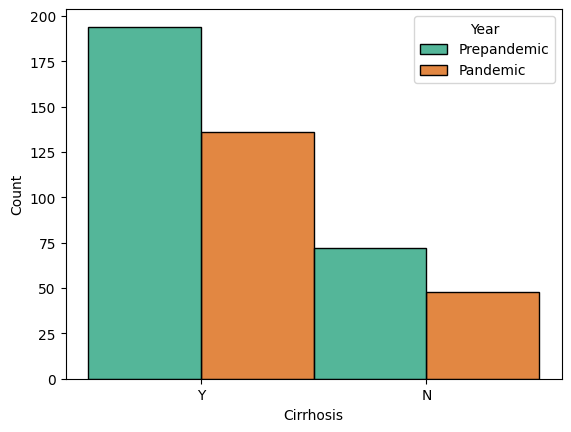

In [60]:
sns.histplot(data_knn, x='Cirrhosis', hue='Year', binwidth=2, palette="Dark2", multiple="dodge")

Previous underlying liver disease cases were detected in the pre-pandemic time. It seems likely that detecting an underlying liver disease wasn't able because the health system was saturated. 

### Previous known cirrhosis

- Did COVID increases the previous know cirrhosis?

<AxesSubplot:xlabel='Prev_known_cirrhosis', ylabel='Percent'>

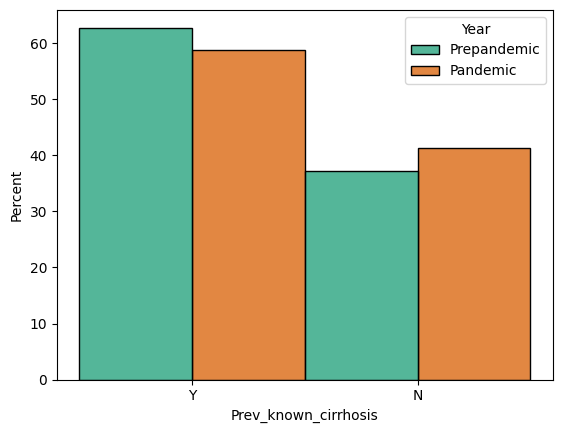

In [61]:
sns.histplot(data_knn, x='Prev_known_cirrhosis', hue='Year', binwidth=2, palette="Dark2", multiple="dodge", \
            stat = 'percent', common_norm = False)

This plot followed the same trend than previous plots. Predicting diseases during the pandemic was fewer.  The known cirrhosis  cases are more for pre-pandemic than pandemic, and also the not known cirrhosis during the pandemic cases increased. 

## Bidimensional Analysis

### Mode of presentation vs Age 

- Can the age influence the way that liver cancer is presented?

<AxesSubplot:xlabel='Mode_Presentation', ylabel='Age'>

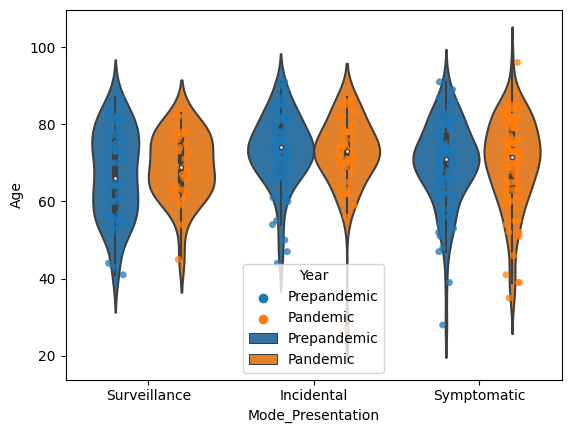

In [62]:
sns.stripplot(data_knn, x='Mode_Presentation', y='Age', hue = 'Year', alpha=0.75, dodge=True)
sns.violinplot(data_knn, x='Mode_Presentation', y='Age', hue = 'Year')

From the previous plot, it shows that the mode_presentation of cancer is not influenced with the age of the patient

### Treatment_grps vs Survival_fromMDM

- Is possible that the kind of treatment might change the survival?

<AxesSubplot:xlabel='Treatment_grps', ylabel='Survival_fromMDM'>

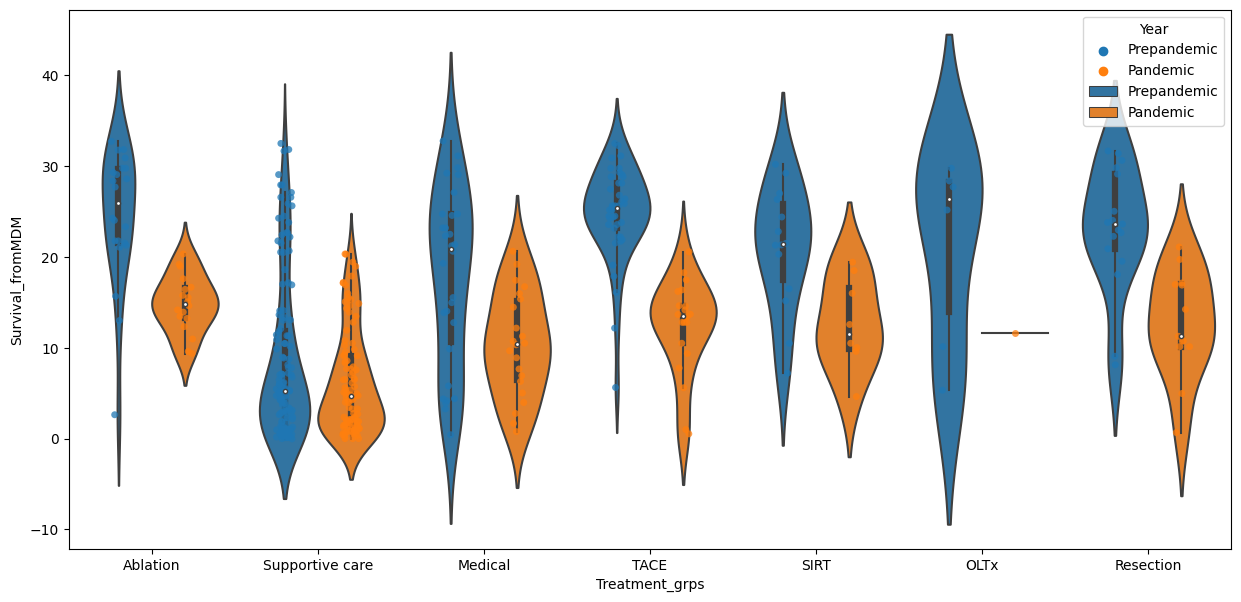

In [63]:
plt.figure(figsize=(15,7))
sns.stripplot(data_knn, x='Treatment_grps', y='Survival_fromMDM', hue = 'Year', alpha=0.75, dodge=True)
sns.violinplot(data_knn, x='Treatment_grps', y='Survival_fromMDM', hue = 'Year')

### Etiology vs Age

- Can the age influence in the etiology (manner of causation of the disease)?

<AxesSubplot:xlabel='Etiology', ylabel='Age'>

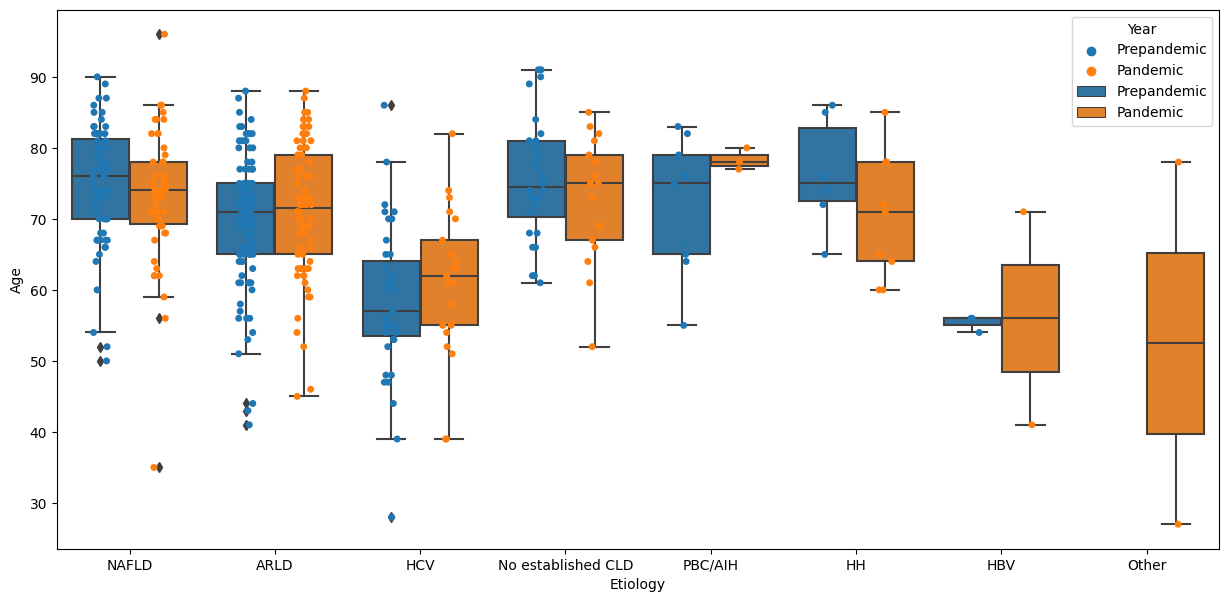

In [64]:
plt.figure(figsize=(15,7))
sns.stripplot(data_knn, x='Etiology', y='Age', hue= 'Year', dodge=True)
sns.boxplot(data_knn, x='Etiology', y='Age', hue= 'Year', dodge=True)

It seems that pandemic increase the range of age to detect liver disease by each etilogy. For instance, in pre-pandemic time, for ARLD the range is from 50 to 88, but for pandemic time it is from 45 to 88 roughly. The same trend follows the rest of etiology cases, except the PBC/AIH, which pandemic provoked to reduce the range in the age.

### Etiology vs Size

Can the etiology influence in the size of the tumor?

<AxesSubplot:xlabel='Etiology', ylabel='Size'>

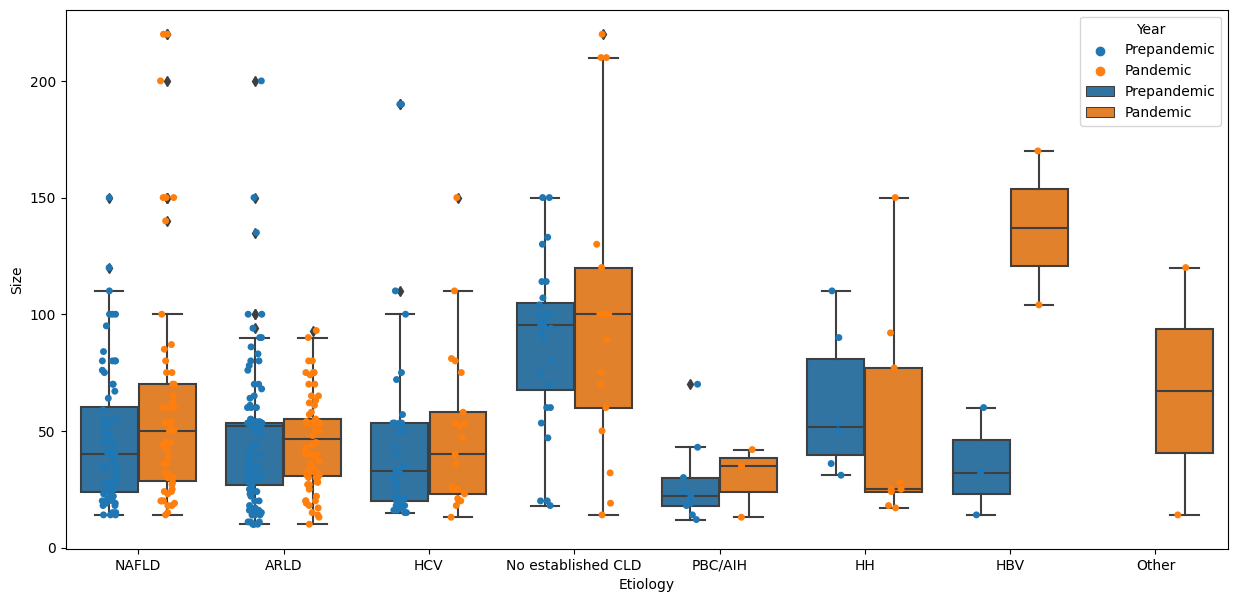

In [65]:
plt.figure(figsize=(15,7))
sns.stripplot(data_knn, x='Etiology', y='Size', hue= 'Year', dodge=True)
sns.boxplot(data_knn, x='Etiology', y='Size', hue= 'Year', dodge=True)

With the current data, it is not possible to distinguish any difference between pandemic and pre-pandemic time and their relationship between age and size.

### Size vs Alive_Dead

Can the size of the tumor determine if the patient can live or not?

<AxesSubplot:xlabel='Alive_Dead', ylabel='Size'>

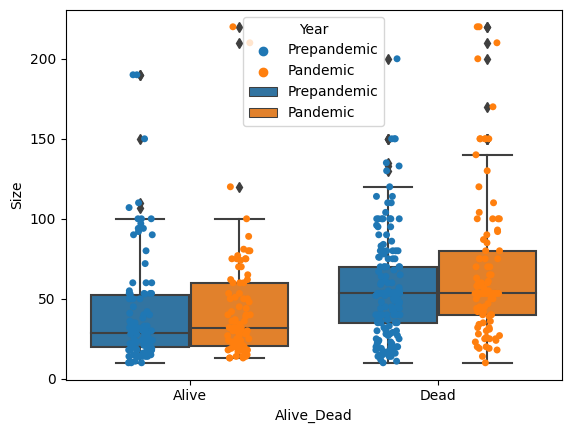

In [66]:
sns.stripplot(data_knn, x='Alive_Dead', y='Size', hue='Year', dodge=True)
sns.boxplot(data_knn, x='Alive_Dead', y='Size', hue='Year', dodge=True)

It seems that alive patient tend to have smaller tumors, in fact the 50% of the data is around 25 mm. However, for dead patient, the 50% of the data is around 50 mm. The time pandemic or pre-pandemic does not influence roughly.

### Size vs Age

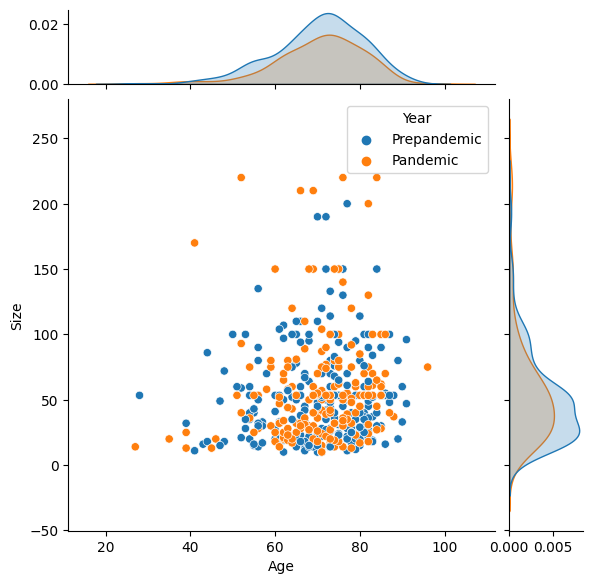

In [67]:
sns.jointplot(data_knn, x='Age', y='Size', hue='Year', marginal_ticks=True)

## Final conclusions

1. Tumors detected in the pre-pandemic time were more smaller than bigger ones. 

undefined. The number of symptomatic tumors increased during the pandemic time.

undefined. The underlying diseases and known cirrhosis cases were fewer during the pandemic time.

undefined. The lower tumor, the higher possibility to be alive.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a4dc7ee-781a-4d60-9638-5b1c20df3e8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>